# Examples

Here are a few examples to give you a flavor of what can be done by linear algebra. We will revisit some of these problems in more detail later in this course. This said, be prepared that we will brush over a lot of details here.

## Text Mining

Text mining and classification problems play a vital role in many real world applications. For example, assume you are asked to categorize a few hundred news paper articles based on the headlines. Of course, you can do this job by hand, but it might be tedious. So let's think about how we can automate this task. 

Assume you are given the following headlines. 

* Tomorrow will be a rainy day! 
* It will be a rainy day tomorrow!
* Deep learning algorithm finds hidden warning!
* Machine learning is able to learn without human supervision!

You can guess that the first and second headline belong to same category, i.e., weather. In order to come up with a quantitative answer, we need to first transform each of these text sequences into a set of ordered numeric values. There are many ways to do so, and a simple method is to count the appearance of each word in the text sequence. First, we need to store the text sequences as strings in a list.

In [1]:
headlines = [
	'tomorrow will be a rainy day', 
	'it will be a rainy day tomorrow',
	'deep learning algorithm finds hidden warning',
	'deep learning is able to learn without human supervision'
]

Now, we can use a function provided by scikit-learn to transform the raw text into a matrix.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(headlines)
X = sentence_vectors.toarray()
print(X)

[[0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0]
 [0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1]]


Looking at the rows, you can tell that the first and second row look very similar. To get a numeric answer, we can compute the cosine of the angle between the first and second row of the matrix, i.e., between two vectors.

In [3]:
X = sentence_vectors.toarray()
similarity = X[0].dot(X[1]) / ( (X[0].dot(X[0]))**0.5 * (X[1].dot(X[1]))**0.5 )
print(similarity)

0.9128709291752769


Cosine similarity is a metric that measures how similar or dissimilar two vectors are and here it matches our intuition. Try to compute the cosine similarity between the first and third row. Did you expect this result?

## Image Processing

Processing and manipulating images, e.g., applying a filter to an image on your phone, requires that we represent an image as an array of numbers. Consider the following image.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data

caller = getattr(data, 'camera')
image = caller()
plt.figure(figsize=(7,7))
plt.imshow(image, cmap=plt.cm.gray)

Instead of plotting the image, we can also print some values of the underlying data matrix.

In [5]:
print(image)

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]


You can see that the data matrix has entries that are integers that are in the range 0 to 255. Each entry of the data matrix represents a pixel. Here 0 represents a black pixel and 255 a white pixel and the values in between represent shades of gray. Since the image is of dimension $512\times 512$, the data matrix has 512 rows and 512 columns.

In [6]:
image.shape

(512, 512)

There are many operations that you can apply to an image, e.g., filters, scaling, rotating, flipping, skewing. Many of these operations can be concisely expressed in terms of matrix equations. For instance, rotating an image involves matrix multiplications. Typically, some routines will do all the hard work for you, but we will talk in more detail about what actually is happening.

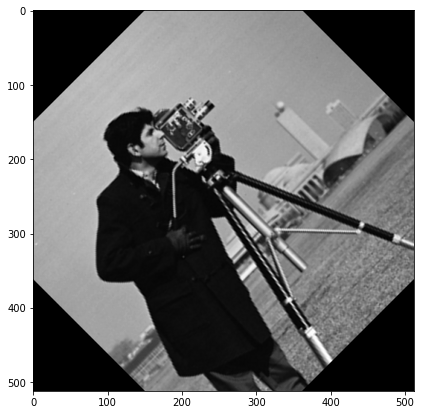

In [7]:
from scipy import ndimage, misc

image_45 = ndimage.rotate(image, 45, reshape=False)

plt.figure(figsize=(7,7))
plt.imshow(image_45, cmap=plt.cm.gray)

Tools from linear algebra can also be used for denoising images. For instance, assume that you are given a noisy image.

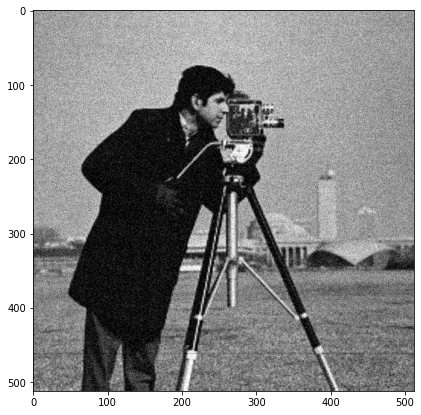

In [8]:
image_noisy = image + np.random.standard_normal(image.shape)*20

image_noisy[image_noisy<0] = 0
image_noisy[image_noisy>255] = 255

plt.figure(figsize=(7,7))
plt.imshow(image_noisy, cmap=plt.cm.gray)

We can use norms to compute the relative error introduced by the additive noise.

In [9]:
print(np.linalg.norm(image-image_noisy)/np.linalg.norm(image))

0.14386861192523695


Here, the relative error is about $14\%$ to $15\%$. We can improve the image quality by computing a low-rank approximation of this image.

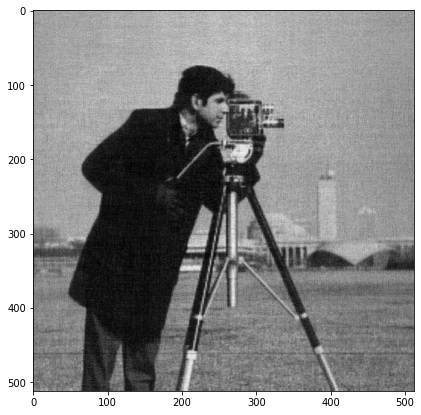

In [10]:
u,s,vt = np.linalg.svd(image_noisy, False)
s2 = s**2 / (s + 26.0**2)

image_denoised = (u*s2).dot(vt)
image_denoised[image_denoised<0] = 0
image_denoised[image_denoised>255] = 255

plt.figure(figsize=(7,7))
plt.imshow(image_denoised, cmap=plt.cm.gray)

The image quality has improved quite a bit and we can quantify this by computing the relative error.

In [11]:
print(np.linalg.norm(image-image_denoised)/np.linalg.norm(image))

0.09654829365953085


There are much better algorithms for reducing the noise in images, but most of these algorithms are based on tools from linear algebra as well. 

## Pattern Recognition


In many situations you have to deal with data matrices that have many rows ans columns. As an example, we consider the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). This dataset tabulates features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features are collected for 569 subjects and describe characteristics of the cell nuclei present in the image. We don't need to understand all the details of this dataset, but we might want to visualize the data in order to generate some insights. 

First, we can load the dataset and double check the dimensions.

In [12]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

print(data['data'])
print(data['data'].shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


Okay, we can see that the data matrix has 569 rows and 32 columns. Now, one way to visualize the data is to project the data onto a low dimensional space so that we can illustrate the data in a two dimensional plot. To do so, we use the singular value decomposition to compute a low-dimensional representation of the data. Again, don't worry about the details at this point. We will talk about all these concepts and methods in great detail and you will understand all the steps below when you revisit this example at the end of this course.

In [13]:
import numpy as np

u,s,vt = np.linalg.svd(data['data']-np.mean(data['data'], axis=0), False)
pc=u*s


Now given the principal components, we can visualize the data.

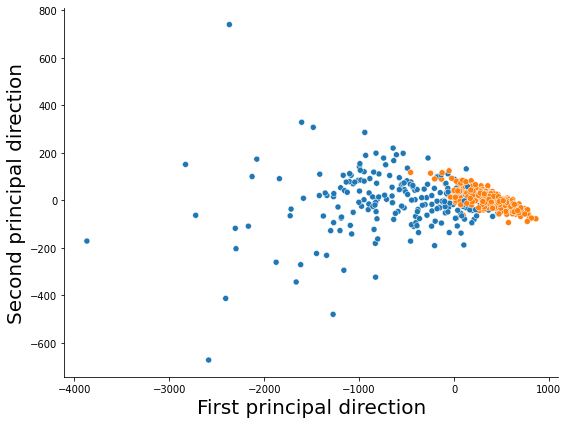

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = {'pc0': pc[:,0], 'pc1': pc[:,1], 'target': data['target']}
df = pd.DataFrame(data=d)

g = sns.pairplot(x_vars=['pc0'], y_vars=['pc1'], data=df, hue="target", height=10)
g._legend.remove()
g.fig.set_size_inches(8,6)
plt.xlabel("First principal direction", fontsize=20)
plt.ylabel("Second principal direction", fontsize=20)
plt.tight_layout()
plt.show()

We can see that there are two clusters, which in turn gives us some evidence that we can discriminate between malignant and benign samples.

In practice, we would also like to understand how much information this plot retains. Further, we typically would like to understand which set of features explain most of the variation in the data. That are all things that we will talk about later in this course.